# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Definiciones (por enunciado):

*   $e$ es un vector columna de unos de dimension n
*   $W$ es una matriz de conectividad tal que:

$$
\begin{equation} \nonumber
w_{ij} = \begin{cases}
1 & \text{si la pagina tiene un link de i a j}\\
0 & \text{caso contrario}
\end{cases}
\end{equation}
$$
$\hspace{0.5cm}$ y definimos $c_j$ como la cantidad de links salientes que tiene una página:
$$
\begin{equation} \nonumber
c_j = \sum_{i=1}^n w_{ij}
\end{equation}
$$

*   $z$ es un vector columna de unos de dimension $n$ tal que:
$$
\begin{equation} \nonumber
z_j = \begin{cases}
\frac{1 - p}{n} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}

\newline
$$
*   $D$ es una matriz diagonal de la forma

$$
\begin{equation} \nonumber
d_{jj} = \begin{cases}
\frac{1}{c_j} & \text{si } c_j \neq 0 \\
0 & \text{si } c_j = 0
\end{cases}
\end{equation}
\newline
$$
*   Formalmente, definimos la matriz $A = a_ij$, donde $a_ij$ representa la probabilidad de pasar de la página j a la página i:

$$
\begin{equation} \nonumber
a_{ij} = \begin{cases}
\frac{1 - p}{n} + \frac{pw_{ij}}{c_j} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}
$$

Luego, debemos probar que $A=pWD+e.z^t$

Notamos que todas las variables de la derecha tienen su definicion por enunciado. Notamos tambien que todas las definiciones partidas tienen como criterio que $c_j$ sea igual a cero o distinto de cero.

Por estas razones decidimos realizar la demostracion de forma algebraica, y estudiando en los dos casos ($c_j$ igual a cero).

Vamos a demostrar que $\forall$ $a_{ij} \in A$:
$$a_{ij} =  p.w_{ij}.d_{ij}+e.z^t$$

**Caso 1**: Si ${c_j\neq 0}$


Queremos ver que: $a_{ij} = p.w_{ij}.d_{ij}+e.z^t$

* Recordemos que $a_{ij} = \frac{1-p}{n}  + p \cdot w_{ij}.\frac{1}{c_j}$ por lo que queremos ver que:
$$p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n}  = p.w_{ij}.d_{ij}+e.z^t$$ 

* Empezando por el primer termino:
$\newline$
$p.w_{ij} = p.w_{ij}$ y ademas: $d_{ij} = \frac{1}{cj}$ porque $c_j \neq 0 \newline$
Por ende el primer termino concuerda

* Luego el segundo termino: $e.z^t = (1-p)/n$ se cumple por definicion

micaaaaaaaaaaaaa: (Solo me queda la duda de que pasa porque la definicion de d es solo para i=j, y  debemos ver que pasa en todos los ij)

**Caso 2**: Si ${c_j = 0}$

*  Queremos ver que $a_{ij} = p.w_{ij}.d_{ij}+e.z^t$

* Recordemos que $a_{ij} = \frac{1}{n}$ por lo que queremos ver que:
$$\frac{1}{n} =p.w_{ij}.d_{ij}+e.z^t$$  

$$e.z^t = 1/n \newline$$
$p.w_{ij}.d_{ij} = 0$ ya que $d_{ij} = 0$ cuando $c_j = 0$


De esta manera, al demostrar para cada indice de la matriz, en todos los casos (cuando $c_j = 0$ y cuando $c_j \neq 0$). Concluyendo, queda demostrado algebraicamente que $A=pWD+e.z^t$

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

La existencia de la factorización $LU$ se garantiza asegurándonos de que no haya pivots nulos en el proceso de eliminación de Gauss. Nos podemos asegurar de esto utilizando el concepto de matriz *diagonal dominante*. Una matriz $A \in \mathbb{R}^{n \times n}$ se dice *diagonal dominante (estrictamente diagonal dominante)* y se denota *DD (EDD)* si y solo si para todo $i, 1\leq i\leq n$
$$\sum_{1 \leq j \leq n, j \neq i}|a_{i,j}| \leq (<) |a_{i,i}|$$
Es decir, el valor absoluto de los números de la diagonal es mayor o igual (mayor estricto para EDD) que los demás. $\newline$

La propiedad que nos interesa de las matrices EDD

Para nuestro caso, debemos asegurarnos que la matriz I-pWD cumpla esta condicion.

Analizandola, tenemos que restarle a la identidad, la matriz pWD.

De la identidad sabemos que es una matriz estrictamente diagonal, cuyos elementos son iguales a uno.

De R, es decir WD, sabemos:
  -D es una matriz estrictamente diagonal, donde sus elementos son iguales a cj, nunca menores a 1.
  -De W sabemos que es una matriz con ceros en las diagonales (debido a que por enunciado, una pagina no se relaciona con si misma), y en las demas posiciones hay un cero en el caso de que no haya una relacion entre i y j, y el 1 en el caso de que sí.

Cuando multiplicamos W*D, obtenemos una matriz cuya diagonal es estrictamente cero, ya que W tiene una diagonal de ceros, y al realizar la multiplicacion esto se traslada. Y en las otras posiciones obtenemos una fraccion de tipo 1/cj o un cero. Como cj nunca es menor a 1, los valores que obtenemos en esta matriz son menores o iguales a 1.

Luego a esta matriz R la multiplicamos por p que pertenece al intervalo abierto (0,1). Es por esto que obtenemos una matriz que su diagonal son ceros, y los demas valores son estrictamente menores a 1.

Al restarle a la identidad, las diagonales, seguiran siendo 1, ya que no les restamos nada.
Las demas posiciones seran restas de 0 (la identidad) - algun valor que sera menor a 1 en modulo. Por lo tanto obtenemos valores pertenecientes a |(0,1)|. Y como la diagonal son todos unos, sabemos que estos valores son menores, que es lo que queriamos demostrar.

 es que el proceso de eliminación de Gauss no produce pivots nulos.

$$\begin{equation}
z_j = \begin{cases}
\frac{1 - p}{n} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}$$

---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [5]:
from funciones import *

0.18115942028985504


### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
0.18115942028985504
BIEN! - Paso correctamente el test unitario
**************************************************


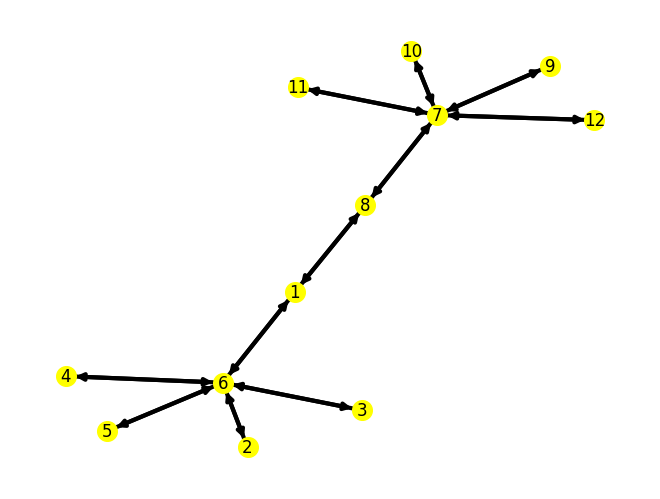

In [2]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    print(obtenerMaximoRankingScore(W, p))
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.18116))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas:

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas?
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

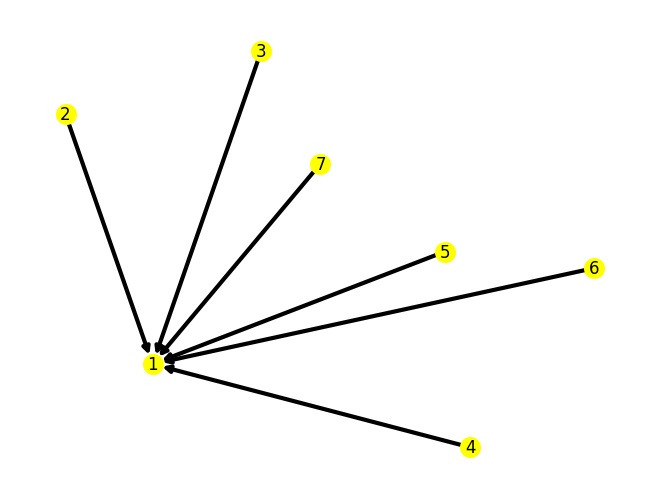

In [13]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_extra.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)


Todos los nodos conectados: todos los nodos deberian tener el mismo puntaje, ya que todos tienen las mismas cantidades de conexiones de entrada y salida. El ranking si variaria, pero esto depende de como hayamos realizado nuestro programa, en nuestro caso:

Ninguno conectado: todos los nodos deberian tener el mismo puntaje(0), ya que todos tienen las mismas cantidades de conexiones de entrada y salida (nulas). El ranking si variaria, pero esto depende de como hayamos realizado nuestro programa, en nuestro caso:

Test extra: Para nuestro test extra escogimos el caso en el que hay paginas mucho "mejores" que otras. Con mejores nos referimos al criterio de pagerank. Esto seria: paginas que tienen muchas conexiones de entrada y pocas de salida, paginas que ademas reciben una conexion de otra pagina tambien buena. Tambien tenemos a sus opuestas: paginas con muchas conexiones de salida y pocas de entrada.
En este caso esperamos: paginas con mucho mayor puntaje que otras, y esto se vera reflejado en el ranking, las paginas de mayor puntaje se encontraran primeras en el ranking y viceversa.
Escogimos este test extra por dos razones: en primer lugar porque es la situacion mas real, y por la que es tan util el pagerank. Se crea para organizar miles o millones de paginas con distinto numero de conexiones.
En segundo lugar, lo elegimos ya que es una buena instancia de test, como no hay patrones repetidos, hay muchas instancias donde el codigo podria fallar por lo que es un test bastante integral.

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


Para estudiar en detalle los tiempos de procesamiento, vamos a separar en dos criterios para estudiar como es la variacion de los tiempos de procesamiento respecto a cada uno.

Primer criterio: cantidad de paginas. Para este caso vamos a ir aumentando la cantidad de paginas, dejando constante la cantidad de relaciones (cero) y calculando su tiempo de procesamiento en cada caso.

In [4]:
import time

def tiempo_ejecucion(W, p):
    tiempo_inicio = time.time()
    calcularRanking(W, p)
    return time.time() - tiempo_inicio


def calcular_densidad_grafo(W):Primer
    cant_nodos = np.shape(W)[0]
    cant_relaciones = np.count_nonzero(W == 1)
    if cant_nodos <= 1:
        return 0
    return cant_relaciones / (cant_nodos * (cant_nodos-1))

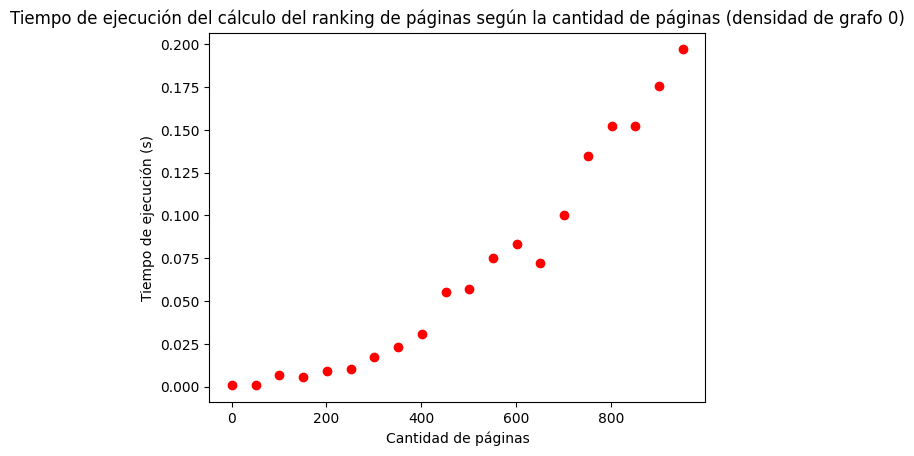

In [16]:
import matplotlib.pyplot as plt
archivo_test = './tests/test_cuantitativo.txt'
cant_iteraciones = 20
salto = 50
p = 0.5
tiempos_ejecucion = np.zeros(cant_iteraciones)
cant_nodos = np.arange(1, cant_iteraciones*salto, salto)
for i in range(1, cant_iteraciones*salto, salto):
    f = open(archivo_test, 'w')
    f.write(str(i))
    f.write('\n')
    f.write('0')
    f.close()
    W = leer_archivo(archivo_test)
    tiempos_ejecucion[i//salto] = tiempo_ejecucion(W,p)


plt.title("Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de páginas (densidad de grafo 0)")
plt.xlabel("Cantidad de páginas")
plt.ylabel("Tiempo de ejecución (s)")
plt.scatter(cant_nodos, tiempos_ejecucion, color ="red")
plt.show()


Observamos una tendencia que se asemeja a la parte positiva de una funcion cubica cuyo punto de inflexion se encuentra en el origen.

Nuestra deduccion es que esto es acorde a lo esperado ya que al aumentar la cantidad de nodos del grafo, la matriz sobre la que aplicamos la factorizacion LU es más grande. La complejidad de realizar esta operacion es de O(n^3) por lo que se condice el resultado con lo esperable.

Segundo criterio: densidad del grafo. Para este caso vamos a ir aumentando la cantidad de relaciones, dejando constante la cantidad de paginas (o nodos en el grafo)

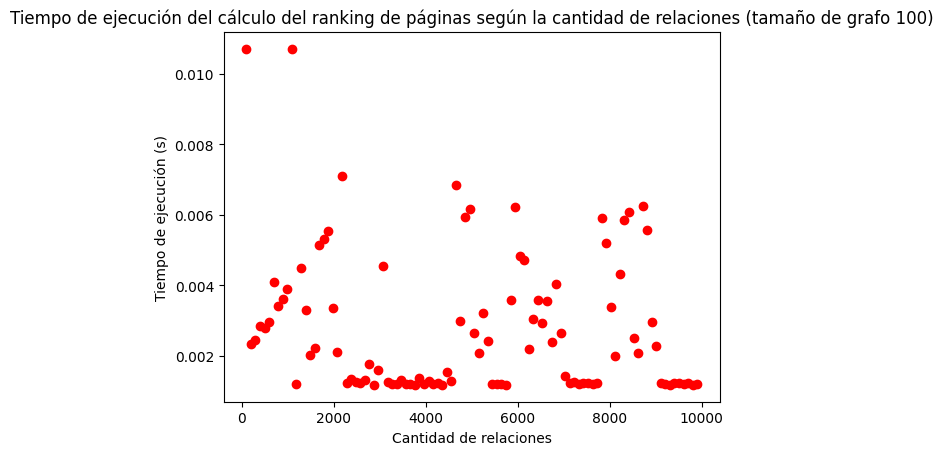

In [17]:
archivo_test = './tests/test_cuantitativo.txt'
tamano_grafo = 100
p = 0.5
cant_relaciones = 0
relaciones = []
tiempos_ejecucion = np.zeros(tamano_grafo)
cant_relaciones = np.zeros(tamano_grafo)


for i in range(1, tamano_grafo+1):
    nuevas_relaciones = []
    for j in range(1, tamano_grafo+1):
        if j != i:
            nuevas_relaciones.append(str(j) + ' ' + str(i) + '\n')
    relaciones.extend(nuevas_relaciones)
    cant_relaciones[i-1] = len(relaciones)
    f = open(archivo_test, 'w')
    f.write(str(tamano_grafo))
    f.write('\n')
    f.write(str(len(relaciones)  ))
    f.write('\n')
    f.writelines(relaciones)
    f.close()
    W = leer_archivo(archivo_test)
    tiempos_ejecucion[i-1] = tiempo_ejecucion(W,p)

plt.title("Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de relaciones (tamaño de grafo 100)")
plt.xlabel("Cantidad de relaciones")
plt.ylabel("Tiempo de ejecución (s)")
plt.scatter(cant_relaciones, tiempos_ejecucion, color ="red")
plt.show()




No es posible observar tendencia ni diferencia signifitiva al aumentar la cantidad de relaciones en grafos con  igual cantidad de nodos.


Nuestra deduccion es que la matriz sobre la cual se realiza la factorizacion LU, tiene el mismo tamaño pero diferentes valores y, en la cantidad de operaciones no afecta qué valores tengo.

En este caso no hay una tendencia para que algunos valores tomen valores mas altos que otros, como si sucedia en el caso anterior, en el que los tiempos de ejecucion, eran dependientes de la cantidad de nodos.

Ademas, las variaciones en los tiempos de ejecucion son mucho menores en relacion al primer grafico; y cada vez que ejecutamos el codigo nos devuelve un resultado distinto. Lo que nos hace pensar que depende de factores externos (computacionales) pero esperariamos que el valor se mantenga constante.


Por esto finalmente concluimos que el tiempo de ejecucion no depende de la cantidad de relaciones, sino de la cantidad de grafos.


### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$.


[0.26190589568621103, 0.2727283057804283, 0.28260964082764856, 0.29166753471860535, 0.30000079999680007, 0.30769304733443326, 0.31481550068333075, 0.3214292091813958, 0.32758680142482266]
[0.24603136810459633, 0.24242389807319056, 0.23913011972411716, 0.23611082176046488, 0.23333306666773332, 0.23076898422185554, 0.22839483310555647, 0.22619026360620137, 0.22413773285839245]
[0.2460313681045964, 0.24242389807319056, 0.23913011972411716, 0.23611082176046488, 0.23333306666773337, 0.23076898422185554, 0.22839483310555644, 0.22619026360620142, 0.22413773285839245]
[0.2460313681045964, 0.24242389807319056, 0.23913011972411713, 0.23611082176046488, 0.23333306666773335, 0.23076898422185554, 0.22839483310555644, 0.22619026360620142, 0.2241377328583925]


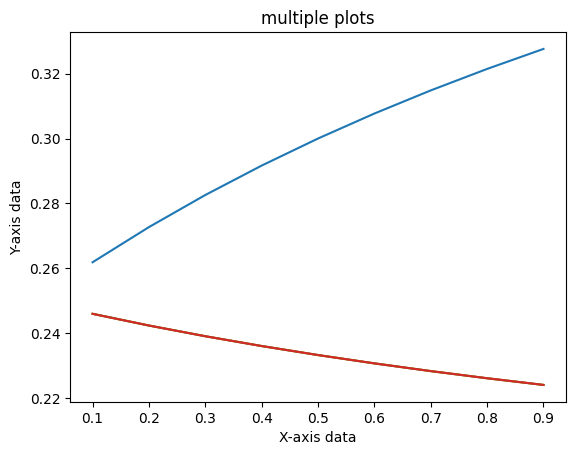

In [12]:
# primero probar varios grafos con 3 o 4 ps distintas
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'

#CARGA DE ARCHIVO EN GRAFO



# hacer una hipotesis

# explicar nuestro argumento

# conclusion respecto a p

#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_slides.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)
p = 0.00001

x = []
y = []

for _ in range(9):
    p += 0.1
    x.append(p)


for i in range(np.shape(W)[0]):
  scores_i = []
  for j in range(9):
    p_actual=x[j]
    rnk, scr = calcularRanking(W,p_actual)
    scores_i.append(scr[i])
  print(scores_i)
  plt.plot(x, scores_i)



plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()





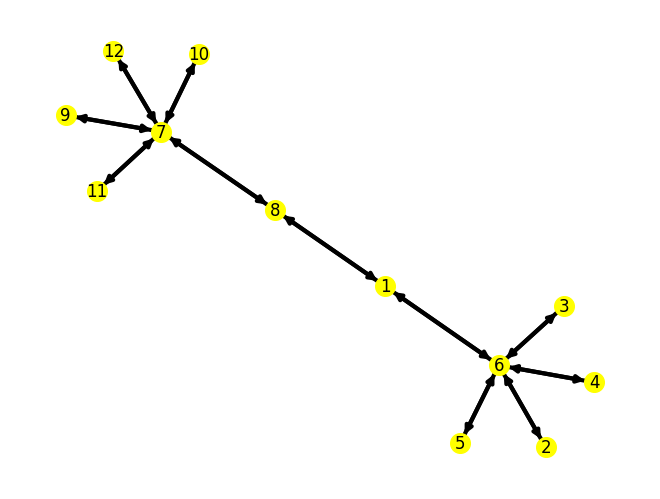

In [ ]:
# primero probar varios grafos con 3 o 4 ps distintas
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)
p = 0.5




# hacer una hipotesis

Al observar los graficos, notamos que al aumentar p, las paginas que eran mejores, terminan teniendo aun con mejor puntaje, y las que eran peores, terminan aun con menor puntaje.

# explicar nuestro argumento

Notamos que esto lo podemos deducir del origen algebraico de nuestro problema.
Revisando nuestras definiciones tenemos:

A=pWD+e.z^t



# conclusion respecto a p

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta:

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



Para hallar la mínima cantidad de links, encontramos que la forma más eficiente es simplemente haciendo más importante al nodo 1. Proponemos un algoritmo simple de esta forma:
Mientras que el nodo 1 no está primero:
    Conectar con el 1 el nodo con mayor score que no sea 1 y no esté ya conectado con él

Veamos como evoluciona el score:

[ 7  6  8  1  9 12 11 10  5  4  3  2]


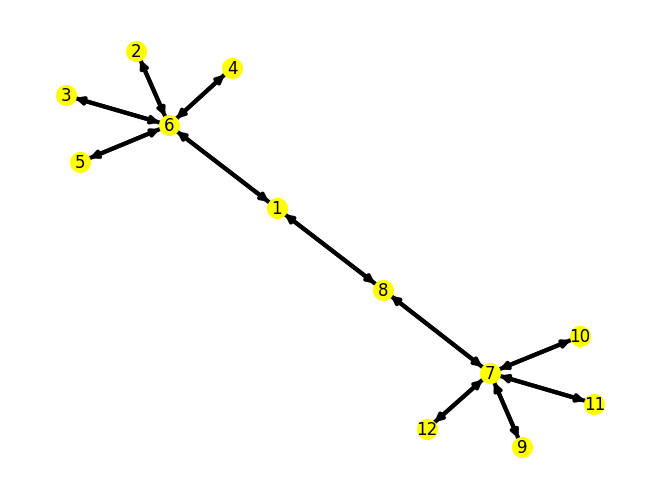

In [50]:
archivo_test = './tests/test_dosestrellas.txt'

W = leer_archivo(archivo_test)
p = 0.9
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)


[ 6  7  1  8  5  4  3  2 11 10  9 12]


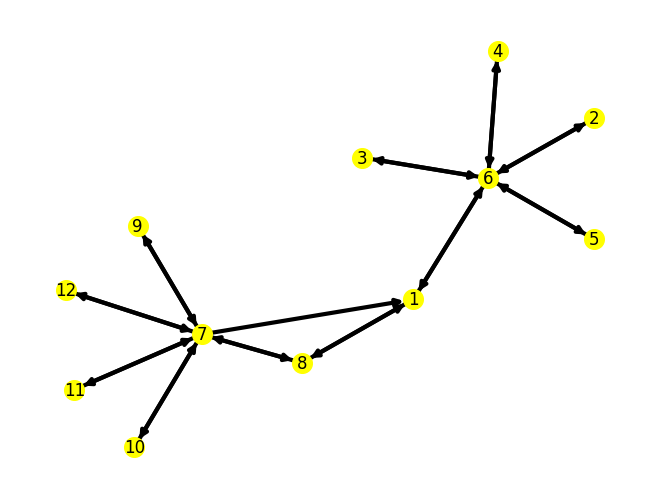

In [51]:
# Conecto el nodo 7 con el 1
W[0,6] = 1 

rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)


[ 6  7  1  8  5  4  3  2 12 11 10  9]


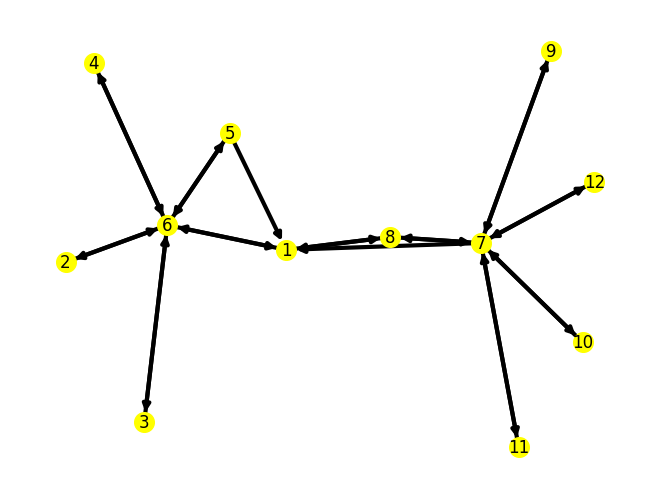

In [52]:
# Conecto el nodo 5 con el 1
W[0,4] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)


[ 6  7  1  8  5  4  3  2 12 11 10  9]


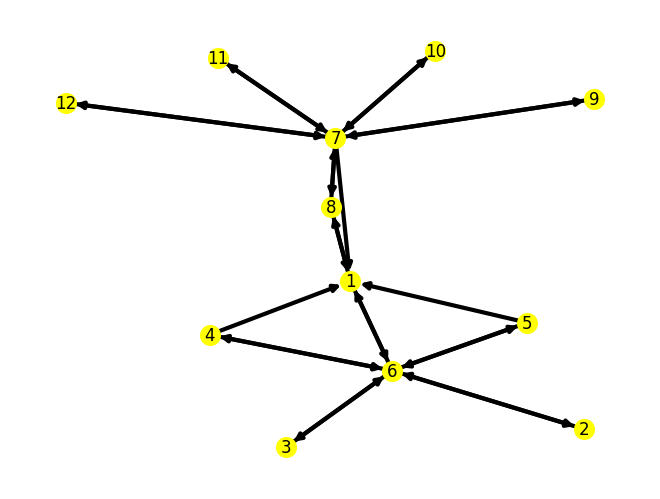

In [53]:
# Conecto el nodo 4 con el 1
W[0,3] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)

[ 7  6  1  8  5  4  3  2 12 11 10  9]


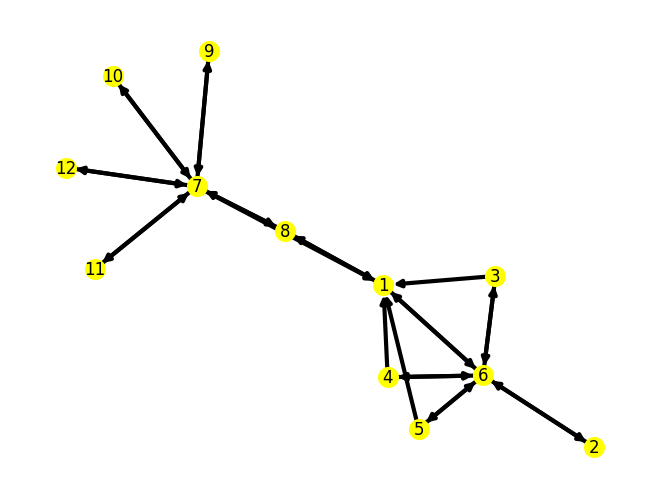

In [54]:
# Conecto el nodo 3 con el 1
W[0,2] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)

[ 1  6  7  8  5  4  3  2 12 11 10  9]


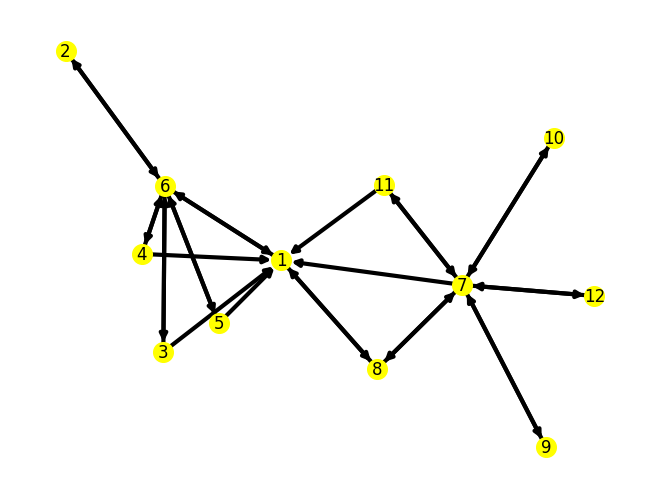

In [55]:
# Conecto el nodo 11 con el 1
W[0,10] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)